# Efficient Frontier 

In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit_108 as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 生成投资组合

In [7]:
l = ["Food","Beer","Smoke","Coal"]
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [9]:
cov.loc[l,l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [12]:
import numpy as np
weights = np.repeat(1/4,4)
erk.portfolio_return(weights,er[l])

0.19511097196038385

In [13]:
erk.portfolio_vol(weights,cov.loc[l,l])

0.05505919577643704

### 2 Asset Frontier

In [14]:
l = ["Games","Fin"]

In [22]:
n_points = 20
weights = [np.array([w,1-w]) for w in np.linspace(0,1,n_points)]

In [23]:
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [24]:
l

['Games', 'Fin']

In [34]:
import pandas as pd
rets = [erk.portfolio_return(w,er[l]) for w in weights]
vols = [erk.portfolio_vol(w,cov.loc[l,l]) for w in weights]
ef = pd.DataFrame({"R":rets,"V":vols})
ef
#ef.plot.line(x="V",y="R")

,R,V
0,0.223371,0.063100
1,0.215205,0.061845
2,0.207039,0.060699
3,0.198873,0.059666
4,0.190706,0.058753
5,0.182540,0.057965
6,0.174374,0.057308
7,0.166207,0.056786
8,0.158041,0.056403
9,0.149875,0.056161


<Axes: xlabel='Volatility'>

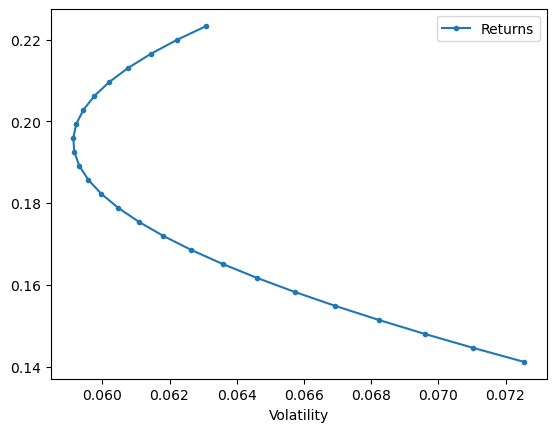

In [35]:
l = ["Fin","Beer"]
erk.plot_ef2(25,er[l],cov.loc[l,l])

# Efficient Frontier - Part III - Running the Optimizer

In [37]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit_109 as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Axes: xlabel='Volatility'>

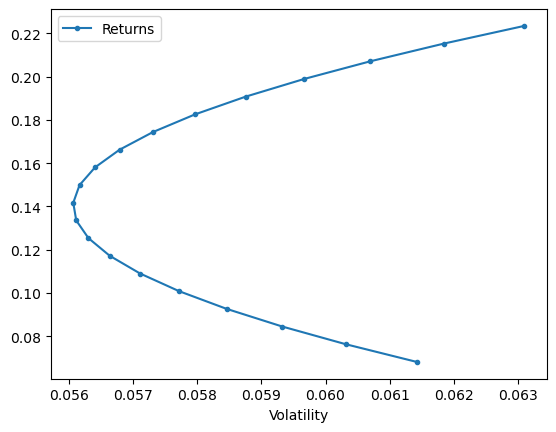

In [38]:
l = ["Games", "Fin"]
erk.plot_ef2(20, er[l], cov.loc[l,l])

In [39]:
w15 = erk.minimize_vol(0.15,er[l],cov.loc[l,l]) #目标回报15%
vol15 = erk.portfolio_vol(w15,cov.loc[l,l])
vol15

0.056163669406706564

In [41]:
w15 #优化出来的权重

array([0.47287631, 0.52712369])

<Axes: xlabel='Volatility'>

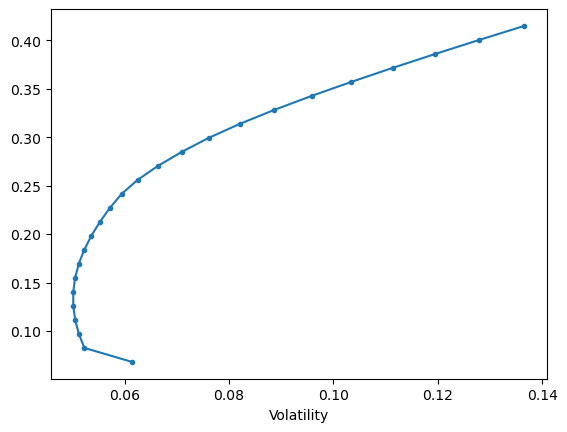

In [42]:
l = ["Smoke", "Fin", "Games", "Coal"]
erk.plot_ef(25,er[l],cov.loc[l,l])